In [1]:
#This program attempts to optimize users protfolio using Efficient Froniter

In [2]:
#Import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock tickers in the portfolio
assets = ['FB', 'AMZN', 'AAPL', 'GOOG', 'NVDA', 'BLK', 'ADBE', 'INTU']

In [5]:
#Assign weights to the stocks
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [13]:
#Get the stocks starting date
stockStartDate = '2013-01-01'

In [14]:
#Get the stocks ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-09-01'

In [15]:
#Create a dataframe to store adjusted close price of the stocks
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [16]:
df.head()

,FB,AMZN,AAPL,GOOG,NVDA,BLK,ADBE,INTU
Date,,,,,,,,
2012-12-31,26.620001,250.869995,16.569740,352.369232,11.351471,169.607178,37.680000,55.025948
2013-01-02,28.000000,257.309998,17.094694,360.274597,11.777379,174.579407,38.340000,57.310993
2013-01-03,27.770000,258.480011,16.878920,360.483826,11.786641,175.055374,37.750000,57.116699
2013-01-04,28.760000,259.149994,16.408764,367.607117,12.175515,178.895294,38.130001,57.560757
2013-01-07,29.420000,268.459991,16.312239,366.003143,11.823678,178.567108,37.939999,57.625526


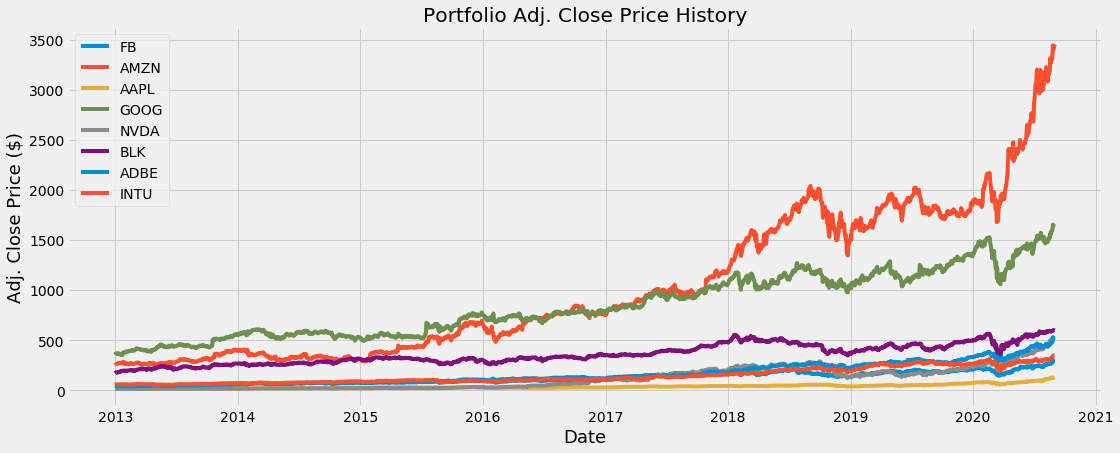

In [19]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(16.5, 6.5))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close Price ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [21]:
#Show the daily simple return
returns = df.pct_change()
returns.head()

,FB,AMZN,AAPL,GOOG,NVDA,BLK,ADBE,INTU
Date,,,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031681,0.022435,0.037520,0.029316,0.017516,0.041527
2013-01-03,-0.008214,0.004547,-0.012622,0.000581,0.000786,0.002726,-0.015389,-0.003390
2013-01-04,0.035650,0.002592,-0.027855,0.019760,0.032993,0.021935,0.010066,0.007775
2013-01-07,0.022949,0.035925,-0.005883,-0.004363,-0.028897,-0.001835,-0.004983,0.001125


In [22]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,GOOG,NVDA,BLK,ADBE,INTU
FB,0.118115,0.053008,0.042582,0.049062,0.056054,0.035974,0.049545,0.040650
AMZN,0.053008,0.092590,0.036735,0.046806,0.052542,0.033285,0.048005,0.035883
AAPL,0.042582,0.036735,0.078369,0.037243,0.054225,0.036487,0.041182,0.038319
GOOG,0.049062,0.046806,0.037243,0.064868,0.050650,0.036400,0.044479,0.037703
NVDA,0.056054,0.052542,0.054225,0.050650,0.168164,0.050442,0.062314,0.055645
BLK,0.035974,0.033285,0.036487,0.036400,0.050442,0.071214,0.040430,0.041086
ADBE,0.049545,0.048005,0.041182,0.044479,0.062314,0.040430,0.086391,0.048712
INTU,0.040650,0.035883,0.038319,0.037703,0.055645,0.041086,0.048712,0.070162


In [23]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05094957614010019

In [24]:
#Calculate the portfolio volatility(STD)
port_volatility = np.sqrt(port_variance)
port_volatility

0.22572012790201096

In [25]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.34321331988676146

In [27]:
#Show the expected annual return, volatility and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_return = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_return)
print('Annual volatility: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 34.0%
Annual volatility: 23.0%
Annual variance: 5.0%


In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
#Portfolio optimization
#Calculate the expected returns and the annualised sample covariance matrix of assets return
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.04605), ('AMZN', 0.28952), ('AAPL', 0.02935), ('GOOG', 0.0), ('NVDA', 0.40975), ('BLK', 0.0), ('ADBE', 0.22533), ('INTU', 0.0)])
Expected annual return: 50.4%
Annual volatility: 27.9%
Sharpe Ratio: 1.73


(0.5035993785951748, 0.27943020193134804, 1.730662524138991)

In [30]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = clean_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remainung ${:.2f}'.format(leftover))

Discrete allocation:  {'FB': 2, 'AMZN': 1, 'AAPL': 1, 'NVDA': 7, 'ADBE': 4}
Funds remainung $35.18
